In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from tensorflow import keras

In [2]:
train = pd.read_csv("./Data/train_20k.csv",header=None)
test = pd.read_csv("./Data/test_1k.csv",header=None)

In [8]:
train.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
test.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
# 결측치 확인
print(train.isnull().sum().sum())
print(test.isnull().sum().sum())

0
0


In [6]:
# target 개수 확인
targetCount = []
for i in sorted(train[0].unique()):
    print(i,":",len(train[train[0]==i]))
    targetCount.append(len(train[train[0]==i]))
print(targetCount)

0 : 1994
1 : 2281
2 : 1929
3 : 2076
4 : 1945
5 : 1776
6 : 1971
7 : 2093
8 : 1922
9 : 2014
[1994, 2281, 1929, 2076, 1945, 1776, 1971, 2093, 1922, 2014]


In [7]:
np.min(targetCount) / np.max(targetCount)

0.7786058746163963

In [10]:
# Label과 Data로 분리 & 표준화
train_label = train.loc[:,train.columns == 0]
train_data = train.loc[:,train.columns != 0]
train_data = train_data/255

test_label = test.loc[:,test.columns == 0]
test_data = test.loc[:,test.columns != 0]
test_data = test_data/255

## Deep Learning Model 만들기
- relu

In [11]:
model = keras.Sequential()
model.add(keras.layers.Dense(512, activation='relu',input_shape=(28*28,)))
# Target: 0~9
model.add(keras.layers.Dense(10, activation='softmax'))

# 모델 구축
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

# 데이터 훈련
hist = model.fit(np.array(train_data),np.array(train_label),epochs=10)


Epoch 1/10


2023-02-28 15:23:13.718163: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


626/626 [==============================] - 1s 953us/step - loss: 0.3193 - accuracy: 0.9096
Epoch 2/10
626/626 [==============================] - 1s 1ms/step - loss: 0.1320 - accuracy: 0.9614
Epoch 3/10
626/626 [==============================] - 1s 893us/step - loss: 0.0788 - accuracy: 0.9764
Epoch 4/10
626/626 [==============================] - 1s 965us/step - loss: 0.0516 - accuracy: 0.9853
Epoch 5/10
626/626 [==============================] - 1s 928us/step - loss: 0.0330 - accuracy: 0.9910
Epoch 6/10
626/626 [==============================] - 1s 1ms/step - loss: 0.0234 - accuracy: 0.9935
Epoch 7/10
626/626 [==============================] - 1s 901us/step - loss: 0.0161 - accuracy: 0.9957
Epoch 8/10
626/626 [==============================] - 1s 913us/step - loss: 0.0158 - accuracy: 0.9959
Epoch 9/10
626/626 [==============================] - 1s 1ms/step - loss: 0.0141 - accuracy: 0.9960
Epoch 10/10
626/626 [==============================] - 1s 901us/step - loss: 0.0106 - accuracy: 0.9

---
## 테스트 데이터로 평가하기

In [14]:
score = model.evaluate(test_data,test_label)
print('loss =',score[0])
print('accuracy =',score[1])

32/32 [==============================] - 0s 811us/step - loss: 0.0906 - accuracy: 0.9730
loss = 0.09058141708374023
accuracy = 0.9730269908905029


In [15]:
# 예측
model.predict(test_data.loc[0:4])
# 0~4까지 각각 0~9일 확률 (5 input * 10 result)

1/1 [==============================] - 0s 61ms/step


array([[5.3829587e-11, 1.6277767e-13, 4.8441457e-08, 9.4611283e-07,
        2.1570468e-16, 9.9074720e-13, 8.5217841e-17, 9.9999905e-01,
        1.2514877e-09, 3.9245314e-09],
       [1.8491220e-10, 2.1734670e-06, 9.9981159e-01, 1.8521192e-04,
        1.1189667e-16, 3.4514220e-09, 2.5547238e-09, 4.7391960e-17,
        1.0700132e-06, 4.4695260e-15],
       [1.3427664e-08, 9.9925560e-01, 2.2715367e-04, 1.0818850e-06,
        2.0791426e-04, 1.3979111e-06, 1.1849461e-05, 9.8312099e-05,
        1.9617665e-04, 3.7570337e-07],
       [9.9999988e-01, 3.2653552e-15, 1.2987512e-09, 5.5889574e-11,
        2.0358843e-14, 3.4738140e-10, 7.7896139e-08, 4.2392567e-10,
        1.0638180e-12, 1.8812281e-09],
       [2.6332947e-07, 4.4903855e-11, 9.6594526e-08, 3.2989345e-09,
        9.9849105e-01, 7.9407320e-10, 4.4043401e-07, 1.8580741e-06,
        6.3441132e-07, 1.5056439e-03]], dtype=float32)

In [16]:
# argmax: 예측값 중 최대값의 index를 반환
np.argmax(model.predict(test_data.loc[0:4]),axis=1)

1/1 [==============================] - 0s 10ms/step


array([7, 2, 1, 0, 4])

---
번외: Image 만들기

In [17]:
from PIL import Image
train1 = train.loc[:,train.columns!=0]
train1.shape

In [26]:
abc = np.array(train1.iloc[50]).reshape(28,28)
abc.shape

(28, 28)

In [27]:
# image 만들기
image = Image.fromarray(abc.astype(np.uint8))

In [28]:
image

---
### 이미지를 불러서 predict해보기

In [31]:
# image 저장하기
image.save("./Data/mnist_test_3.jpg","JPEG")
img = Image.open("./Data/mnist_test_3.jpg")
img

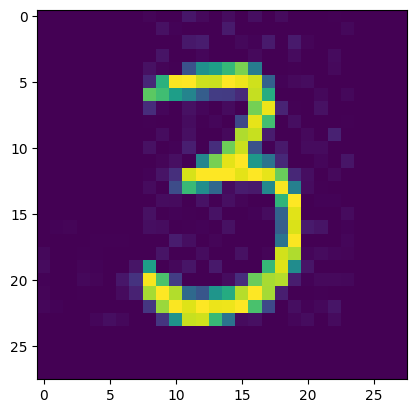

In [33]:
# matplotlib으로 출력
import matplotlib.pyplot as plt
plt.imshow(img)
plt.show()

In [35]:
# img를 numpy배열로 변환
imgArray = np.array(img)
imgArray = imgArray / 256
print(imgArray.shape)
imgArray2 = imgArray.reshape(-1)
print(imgArray2.shape)

(28, 28)
(784,)


In [63]:
np.argmax(model.predict(pd.DataFrame(imgArray2).T),axis=1)[0]

1/1 [==============================] - 0s 11ms/step


3